In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.__version__

'0.24.0'

In [3]:
df = pd.read_csv('police.csv')
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.shape

(91741, 15)

In [5]:
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [6]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# Removing columns

In [7]:
df.drop('county_name', axis=1, inplace=True)

# Remove the columns that only contains missing values

In [8]:
df_drop_column_mv = df.dropna(axis=1, how='all')

In [9]:
df_drop_column_mv.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# Do men or women speed more often?
# Here we will make use of the driver_gender and the violation feature

In [10]:
feature_cols = ['driver_gender', 'violation']

In [11]:
speed = df[df.violation == 'Speeding']

In [12]:
speed

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,2005-06-06,13:20,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,2005-07-13,10:15,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,2005-07-13,15:45,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
10,2005-07-13,16:20,M,1979.0,26.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
11,2005-07-13,19:00,F,1966.0,39.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [13]:
speed.driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [14]:
(speed.driver_gender == 'M').sum()

32979

In [15]:
(speed.driver_gender == 'F').sum()

15482

In [16]:
df.groupby('driver_gender').violation.value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


# From the above result, it can be seen that women speed often more than men

# Does gender affect who gets searched during a stop?

# we will make use of driver_gender and search_conducted

In [17]:
df.groupby('driver_gender').search_conducted.value_counts(normalize=True).unstack()

search_conducted,False,True
driver_gender,,
F,0.979967,0.020033
M,0.956674,0.043326


In [18]:
df.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

# from the above result, we can conclude that gender does not affect who get searched during a stop but it shows that males are often searched more than female but this may be due to other factors

# Why is search_type missing so often?

In [19]:
df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [20]:
df.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [21]:
df[df.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [22]:
df.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Inventory,Protective Frisk                                     11
Incident t

# from above, it shows that search_type is missing anytime search_conducted is false

# During a search, how often is the driver frisked?

In [23]:
df.search_type.str.contains('Frisk').mean()

0.08573216520650813

# We can conclude that the driver frisked 8.6% during search

# Which year had the least number of stops

In [32]:
df['df_year'] = df.stop_date.str.split('-').str.get(0)
# or
# df['df_year'] = df.stop_date.str.slice(0, 4)

In [33]:
df_year.head()

0    2005
1    2005
2    2005
3    2005
4    2005
Name: stop_date, dtype: object

In [48]:
df_year.value_counts(normalize=True)

2012    0.119576
2006    0.115968
2007    0.103291
2014    0.100588
2008    0.095399
2015    0.093731
2011    0.088575
2013    0.086374
2009    0.086199
2010    0.082417
2005    0.027883
Name: stop_date, dtype: float64

In [46]:
df.groupby('df_year').stop_duration.value_counts(normalize=True)

df_year  stop_duration
2005     0-15 Min         0.817166
         16-30 Min        0.141317
         30+ Min          0.041517
2006     0-15 Min         0.857720
         16-30 Min        0.109742
         30+ Min          0.032538
2007     0-15 Min         0.777428
         16-30 Min        0.180348
         30+ Min          0.042223
2008     0-15 Min         0.671574
         16-30 Min        0.277389
         30+ Min          0.051037
2009     0-15 Min         0.687854
         16-30 Min        0.258118
         30+ Min          0.054028
2010     0-15 Min         0.726376
         16-30 Min        0.222588
         30+ Min          0.051036
2011     0-15 Min         0.760264
         16-30 Min        0.187327
         30+ Min          0.052409
2012     0-15 Min         0.847057
         16-30 Min        0.125625
         30+ Min          0.027222
         2                0.000096
2013     0-15 Min         0.880609
         16-30 Min        0.091093
         30+ Min          0.0282

In [49]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,df_year
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005


In [51]:
combined = df.stop_date.str.cat(df.stop_time, sep=' ')

In [53]:
combined.head()

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
3    2005-02-20 17:15
4    2005-03-14 10:00
Name: stop_date, dtype: object

In [54]:
df['stop_datetime'] = pd.to_datetime(combined)

In [55]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,df_year,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-03-14 10:00:00


In [60]:
df.stop_datetime.dt.time.head()

0    01:55:00
1    08:15:00
2    23:15:00
3    17:15:00
4    10:00:00
Name: stop_datetime, dtype: object

# How does drug activity change by time of day?

### stop_datetime, drug_related_stop

In [101]:
df.groupby(df.stop_time.str.slice(0, 2)).drugs_related_stop.mean()

stop_time
00    0.019728
01    0.013507
02    0.015462
03    0.017065
04    0.011811
05    0.004762
06    0.003040
07    0.003281
08    0.002687
09    0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

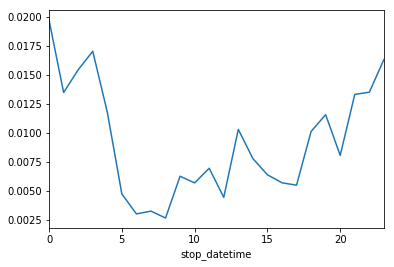

In [107]:
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

## Do most stops occur at night?

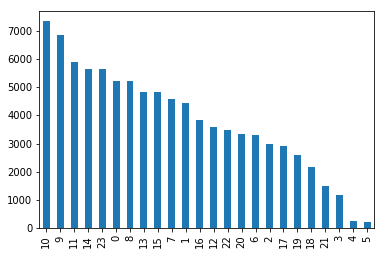

In [110]:
df.stop_datetime.dt.hour.value_counts().plot(kind='bar')

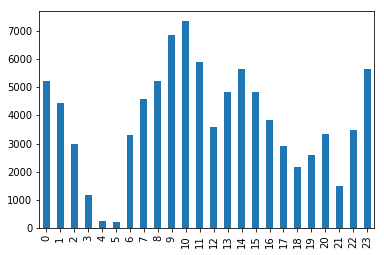

In [111]:
df.stop_datetime.dt.hour.value_counts().sort_index().plot(kind='bar')

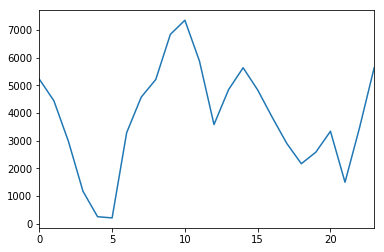

In [112]:
df.stop_datetime.dt.hour.value_counts().sort_index().plot()

## Find the bad data in the stop_duration column and fix it

In [114]:
df.stop_duration.isnull().sum()

5333

In [115]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,df_year,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-01-18 08:15:00


In [131]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [136]:
df.loc[(df.stop_duration == '1') | (df.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [138]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [139]:
import numpy as np

In [140]:
df.loc[df.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [142]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [28]:
df.memory_usage(deep=True).sum()

55107476

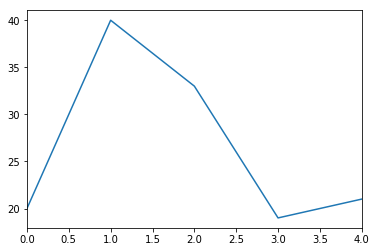

In [29]:
df.driver_age.head().plot()

In [30]:
df_ted = pd.read_csv('ted.csv')
df_ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
